In [1]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import warnings
warnings.filterwarnings('ignore')
from utils.data_proc import tab_data
from utils.data_proc import dataframe_column_adj
from utils.data_proc import load_data
from utils.data_proc import find_nearest
from scipy import interpolate



def recall_from_roc(x, threshold):
    filt_array = np.array(x['precision'])>threshold
    if sum(filt_array)>0:
        return max(np.array(x['recall'])[filt_array])
    else:
        return 0.
    
def energy_from_roc(x, threshold):
    filt_array = np.array(x['precision'])>threshold
    if sum(filt_array)>0:
        return (np.array(x['energy_after_threshold'])[filt_array]).max()
    else:
        return 0.

PATH = '../data/for_analysis/'

In [2]:
files = glob.glob(PATH + '*.json')

In [3]:
files

['../data/for_analysis/tv_wavelets.json',
 '../data/for_analysis/unet.json',
 '../data/for_analysis/energy_results_median_bm3d.json',
 '../data/for_analysis/energy_results_mean_gaussian_cygno.json',
 '../data/for_analysis/energy_results_wiener.json']

In [4]:
result_table = []
for file in files:
    result_table.append(tab_data(file))
result_table = pd.concat(result_table)

In [5]:
#result_table =  dataframe_column_adj(result_table)
result_table.parameter = result_table.parameter.apply(lambda x: 'none' if x == 0 else x)
result_table =  dataframe_column_adj(result_table)
# for i in result_table.parameter:
#     if(type(i)== int):
#         print(i)
#result_table =  dataframe_column_adj(result_table)
# #result_table['parameter'] == 'none'
# result_table['parameter'] = result_table.parameter.apply(lambda x: x[0])
# result_table.parameter

In [6]:
result_table.head()

,particle,energy,image,energia_ped,cluster_integral,filter,parameter,energy_after_threshold,recall,precision,threshold_all,f1
0,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5070.4587238854365, 5068....","[0.99822695035461, 0.99822695035461, 0.9964539...","[0.37309476474486414, 0.4112490869247626, 0.44...","[6.967532691911069, 7.47452379119103, 7.981514...",0.878390
1,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5070.4587238854365, 5065....","[0.99822695035461, 0.99822695035461, 0.9929078...","[0.3132999443516973, 0.3615928066795119, 0.405...","[5.255179576178049, 5.803111390168275, 6.35104...",0.867491
2,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5067.950340722704, 5067.6...","[0.99822695035461, 0.9929078014184397, 0.98936...","[0.2769306443679292, 0.3389830508474576, 0.387...","[4.603215700387495, 5.172285794204093, 5.74135...",0.856146
3,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5067.950340722704, 5067.3...","[0.99822695035461, 0.9929078014184397, 0.99113...","[0.19413793103448276, 0.25396825396825395, 0.3...","[3.564584058853683, 4.131771453955045, 4.69895...",0.852995
4,He,30,pic_run1_ev28,5069.65859,14878.0,tv,0,"[5070.4587238854365, 5067.350237377283, 5068.3...","[0.99822695035461, 0.9911347517730497, 0.98581...","[0.15556783641890023, 0.22368947579031612, 0.2...","[3.235243547037747, 3.804316825317689, 4.37339...",0.843610


In [7]:
result_table = result_table[result_table['filter'] != 'cygno']

In [8]:
files = glob.glob(PATH+'/cygno/' + '*.json')
result_table_cygno = []
for file in files:
    result_table_cygno.append(tab_data(file))
result_table_cygno = pd.concat(result_table_cygno)

result_table_cygno.parameter = result_table_cygno.parameter.apply(lambda x: 'none' if x == 0 else x)
result_table_cygno =  dataframe_column_adj(result_table_cygno)

In [9]:
result_table_cygno

,particle,energy,image,energia_ped,cluster_integral,filter,parameter,energy_after_threshold,recall,precision,threshold_all,f1
0,He,30,pic_run1_ev34,14758.046445,14820.0,cygno,0,"[14758.046444552174, 14758.046444552174, 14758...","[1.0, 1.0, 1.0, 0.9981851179673321, 0.99637023...","[0.00013137236435684167, 0.0001314035376407937...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.657177
1,He,30,pic_run1_ev6,14773.723302,14930.0,cygno,0,"[14773.723301968555, 14773.723301968555, 14773...","[1.0, 1.0, 1.0, 1.0, 0.9982547993019197, 0.987...","[0.00013661798250288434, 0.0001366490970427990...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.656647
2,He,30,pic_run1_ev19,14893.337669,14948.0,cygno,0,"[14893.337668536227, 14893.337668536227, 14893...","[1.0, 1.0, 1.0, 1.0, 0.9964601769911504, 0.987...","[0.00013471035128644808, 0.0001347427343855826...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.637544
3,He,30,pic_run1_ev22,14804.853000,14941.0,cygno,0,"[14804.853000178238, 14804.853000178238, 14804...","[1.0, 1.0, 1.0, 1.0, 0.9982078853046595, 0.994...","[0.00013304200789477952, 0.0001330731966972091...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.645390
4,He,30,pic_run1_ev28,14847.860779,14878.0,cygno,0,"[14847.86077898641, 14847.86077898641, 14847.8...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9893617021276596, ...","[0.0001344726953668911, 0.00013450377051748896...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.645390
...,...,...,...,...,...,...,...,...,...,...,...,...
151,He,10,pic_run1_ev13,4712.051839,4761.0,cygno,0,"[4712.051838766711, 4712.051838766711, 4712.05...","[1.0, 1.0, 1.0, 0.9955257270693513, 0.99552572...","[0.00010657638272127415, 0.0001066010620995305...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.501639
152,He,10,pic_run1_ev66,4873.514836,4868.0,cygno,0,"[4873.51483564467, 4873.51483564467, 4873.5148...","[1.0, 1.0, 1.0, 0.9977973568281938, 0.99339207...","[0.0001082454673402682, 0.0001082705332443003,...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.533546
153,He,10,pic_run1_ev33,4975.607873,4911.0,cygno,0,"[4975.607872989534, 4975.607872989534, 4975.60...","[1.0, 1.0, 1.0, 1.0, 0.9977011494252873, 0.988...","[0.00010371574161762223, 0.0001037390907018295...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.539216
154,He,10,pic_run1_ev50,4909.559639,4925.0,cygno,0,"[4909.55963933897, 4909.55963933897, 4909.5596...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9908883826879271, ...","[0.00010466924993872438, 0.0001046935376900312...","[-4.0, -3.466666666666667, -2.9333333333333336...",0.518639


In [10]:
result_table = result_table.append(result_table_cygno, ignore_index=True)

In [11]:
best_filters = result_table.groupby(['particle', 'energy', 'image', 'filter']).agg({'f1':'max'}).reset_index()

[None, None]

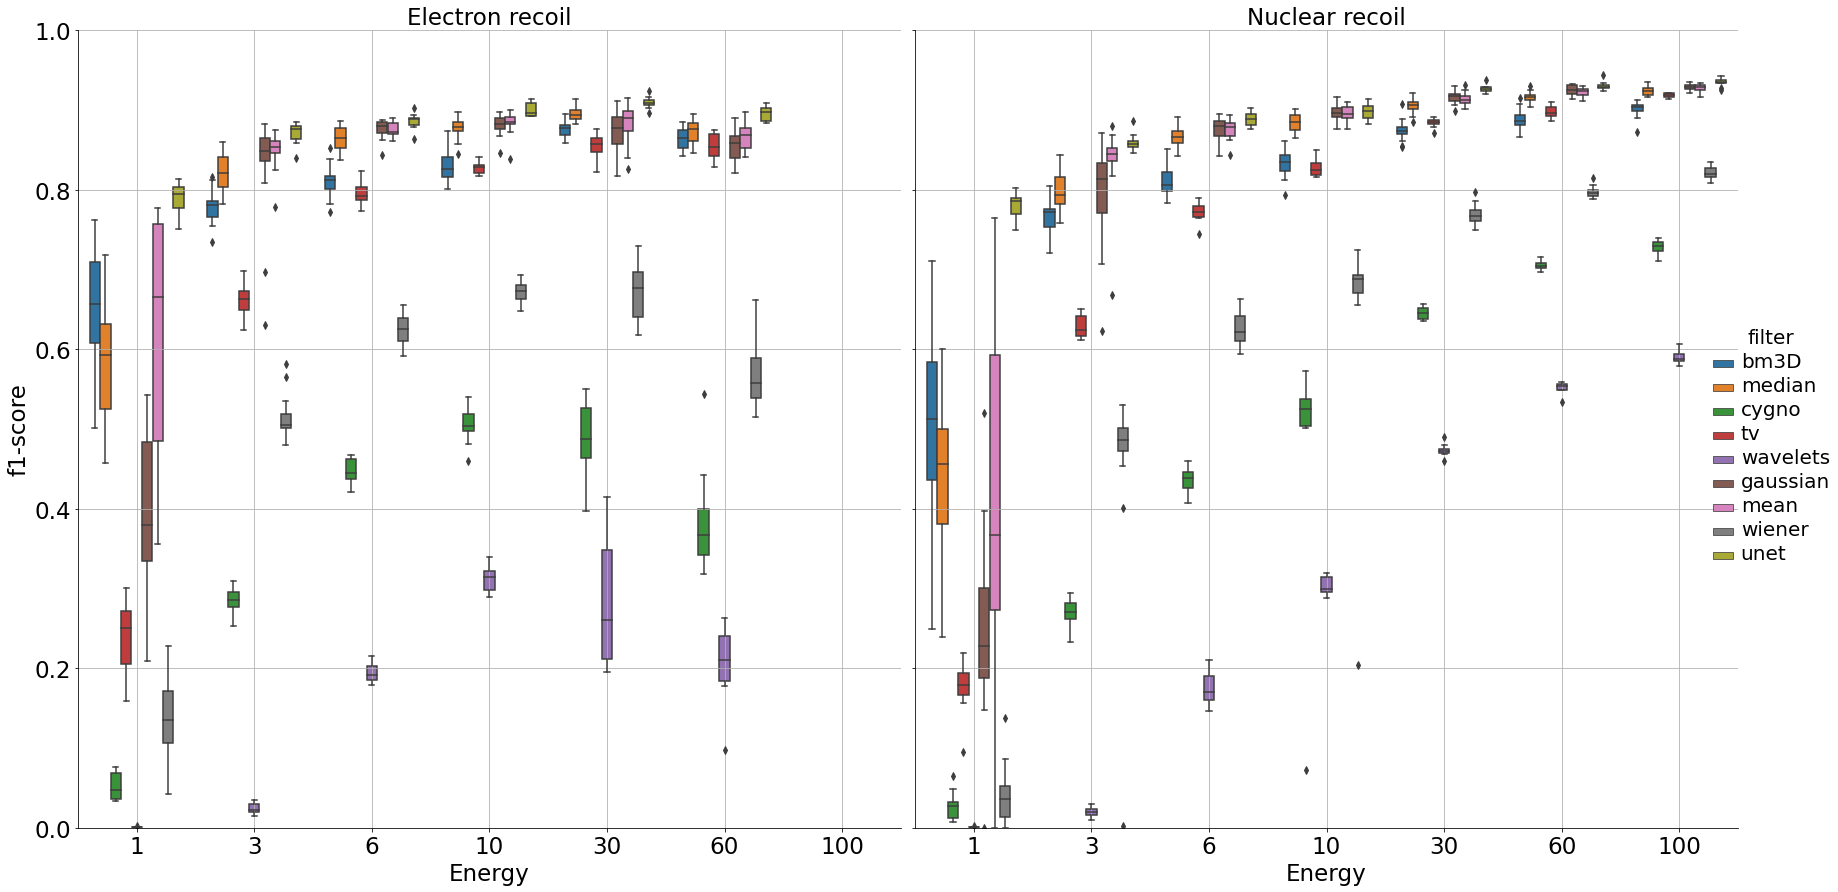

In [12]:
#plt.figure(figsize=(30,15))
g = sns.catplot(x="energy", y="f1", hue="filter", col="particle", data=best_filters, kind="box", height=12, aspect=1)
axes = g.axes.ravel()
axes[0].grid()
axes[1].grid()
axes[0].set_xlabel('Energy', fontsize=23)
axes[0].set_ylabel('f1-score', fontsize=23)
axes[1].set_xlabel('Energy', fontsize=23)
axes[0].tick_params(axis='both', which='major', labelsize=23)
axes[1].tick_params(axis='both', which='major', labelsize=23)
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])
axes[0].set_title('Electron recoil', fontsize=23)
axes[1].set_title('Nuclear recoil', fontsize=23)

plt.setp(g._legend.get_texts(), fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)

In [13]:
threshold_precision = 0.90
result_table['recall_at_p'] = result_table.apply(lambda x: recall_from_roc(x, threshold_precision), axis=1)
result_table['energy_at_p'] = result_table.apply(lambda x: energy_from_roc(x, threshold_precision), axis=1)

In [14]:
energy_table = result_table.groupby(['particle', 'energy', 'image', 'filter']).agg({'f1':'max', 'recall_at_p': 'max', 'energy_at_p':'max', 'cluster_integral': 'max', 'energia_ped':'max'}).reset_index()

In [15]:
energy_table

,particle,energy,image,filter,f1,recall_at_p,energy_at_p,cluster_integral,energia_ped
0,ER,1,pic_run1_ev1,bm3D,0.655462,0.384977,284.869463,498.0,557.003767
1,ER,1,pic_run1_ev1,median,0.569343,0.211268,176.003860,498.0,557.003767
2,ER,1,pic_run1_ev12,cygno,0.051136,0.004695,11.279219,499.0,478.932964
3,ER,1,pic_run1_ev14,bm3D,0.640884,0.488789,373.403318,499.0,495.604244
4,ER,1,pic_run1_ev14,median,0.526946,0.313901,272.693068,499.0,495.604244
...,...,...,...,...,...,...,...,...,...
1781,He,100,pic_run1_ev97,wiener,0.814875,0.710959,7156.490235,49920.0,7472.114393
1782,He,100,pic_run1_ev98,bm3D,0.894356,0.840483,49704.590128,49874.0,49821.610470
1783,He,100,pic_run1_ev98,median,0.929293,0.941019,49778.268393,49874.0,49821.610470
1784,He,100,pic_run1_ev99,cygno,0.732691,0.587904,48881.285110,49898.0,49991.831257


In [16]:
energy_table.columns = ['particle', 'energy', 'image', 'filter', 'f1', 'recall_p_value', 'recovered_energy', 'cluster_integral_truth', 'cluster_integral_after_ped']

In [17]:
data=pd.melt(energy_table[['energy', 'particle', 'cluster_integral_truth', 'cluster_integral_after_ped']], id_vars=['particle', 'energy'])
data

,particle,energy,variable,value
0,ER,1,cluster_integral_truth,498.000000
1,ER,1,cluster_integral_truth,498.000000
2,ER,1,cluster_integral_truth,499.000000
3,ER,1,cluster_integral_truth,499.000000
4,ER,1,cluster_integral_truth,499.000000
...,...,...,...,...
3567,He,100,cluster_integral_after_ped,7472.114393
3568,He,100,cluster_integral_after_ped,49821.610470
3569,He,100,cluster_integral_after_ped,49821.610470
3570,He,100,cluster_integral_after_ped,49991.831257


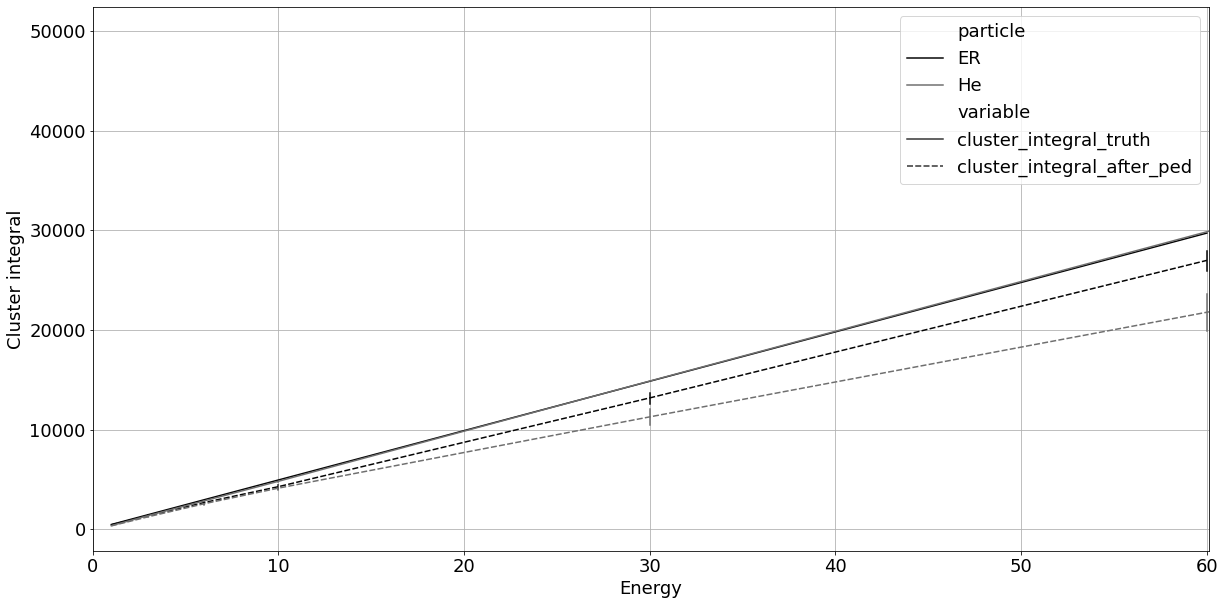

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
#palette = sns.color_palette("mako_r", 2)
# Create an array with the colors you want to use
colors = ["#040404", "#6F6F6F"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
sns.lineplot(x="energy", y="value", hue="particle", data=data,  err_style="bars", style="variable",  palette=customPalette, ax=axes)
axes.grid()
axes.set_ylabel('Cluster integral', fontsize=18)
axes.set_xlabel('Energy', fontsize=18)
axes.set_xlim([0, 60.1])
axes.tick_params(axis='both', which='major', labelsize=18)
axes.legend(fontsize=18)

In [19]:
energy_filter = energy_table[['energy', 'particle', 'filter', 'recovered_energy']]

In [20]:
energy_real = energy_table[['energy', 'particle', 'cluster_integral_after_ped']]
energy_real.columns = ['energy', 'particle', 'recovered_energy']
energy_real['filter'] = 'Energy after ped rem'

In [21]:
energy_filter = energy_filter.append(energy_real).reset_index(drop=True)

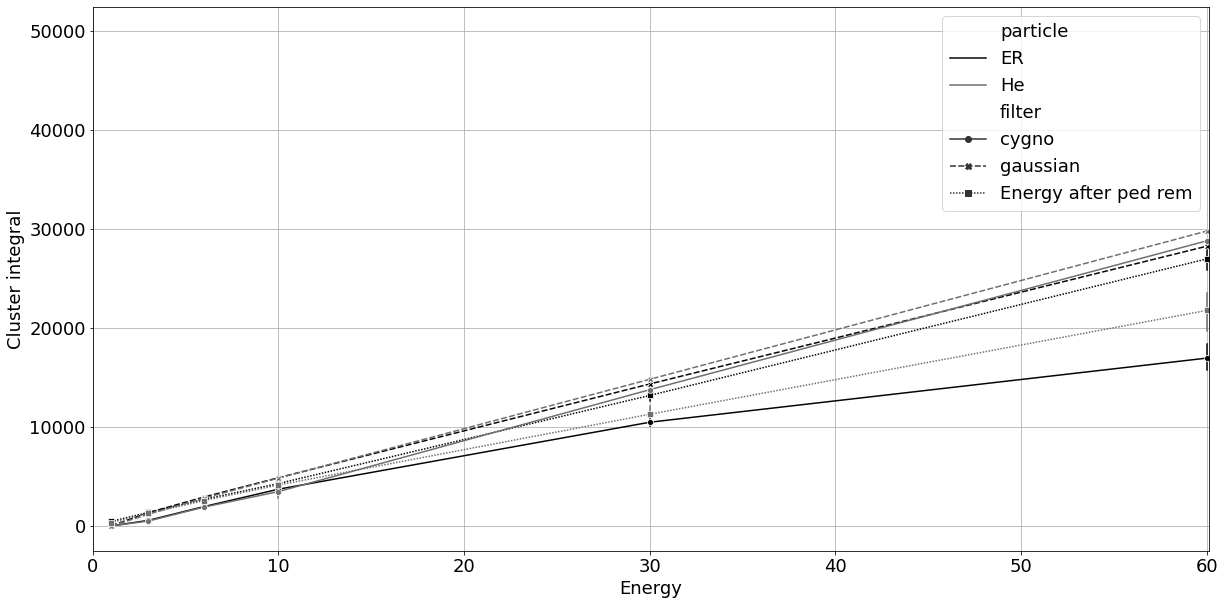

In [22]:
selec_filters = ['gaussian', 'Energy after ped rem', 'cygno']

# Create an array with the colors you want to use
colors = ["#040404", "#6F6F6F"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
#palette = sns.color_palette("hls", 2)
ax = sns.lineplot(x="energy", y="recovered_energy", hue="particle", data=energy_filter[energy_filter['filter'].isin(selec_filters)],  err_style="bars", style="filter",  palette=customPalette, markers=True,ax=axes)
axes.grid()
axes.set_ylabel('Cluster integral', fontsize=18)
axes.set_xlabel('Energy', fontsize=18)
axes.set_xlim([0, 60.1])
axes.tick_params(axis='both', which='major', labelsize=18)
axes.legend(fontsize=18)

## Which point should I have to use?

In [23]:
result_table_by_filter = result_table.groupby(['filter', 'parameter', 'particle', 'energy']).agg({'f1':['median', lambda x: np.quantile(x, q=0.25), lambda x: np.quantile(x, q=0.75)], 'precision':[lambda x: list(x)], 'recall':[lambda x: list(x)], 'threshold_all':[lambda x: list(x)]}).reset_index()
result_table_by_filter.columns = ['filter', 'parameter', 'particle', 'energy', 'f1_median', '25q', '75q', 'precision', 'recall', 'threshold']

In [24]:
particle = 'He'
energy = 30
filter_by_particle_and_energy = result_table_by_filter[(result_table_by_filter.particle == particle)&(result_table_by_filter.energy == energy)]
best_filters = filter_by_particle_and_energy.sort_values('f1_median', ascending=False).drop_duplicates(subset='filter', keep='first')

In [25]:
best_filters

,filter,parameter,particle,energy,f1_median,25q,75q,precision,recall,threshold
517,unet,0,He,30,0.923216,0.920105,0.927046,"[[0.5084444444444445, 0.5494716618635928, 0.57...","[[0.9982547993019197, 0.9982547993019197, 0.99...","[[0.011093705892562866, 0.019334577023983, 0.0..."
205,gaussian,21,He,30,0.916960,0.911380,0.919344,"[[0.45751633986928103, 0.4741744284504657, 0.4...","[[0.9982174688057041, 0.9982174688057041, 0.99...","[[8.48815364188517, 9.404239021030714, 10.3203..."
270,mean,11,He,30,0.911688,0.906801,0.916813,"[[0.00018612801219936172, 0.003516658353799822...","[[0.9982174688057041, 0.9928698752228164, 0.98...","[[-0.32538010444073306, 0.9995093598989545, 2...."
452,median,21,He,30,0.903196,0.899044,0.905745,"[[0.15866209262435677, 0.30356164383561646, 0....","[[0.9982014388489209, 0.9964028776978417, 0.98...","[[3.0528294084538263, 4.048006194236027, 5.043..."
101,bm3D,8,He,30,0.872353,0.865849,0.878416,"[[0.00014137494392764047, 0.000165902320300884...","[[0.9982014388489209, 0.9982014388489209, 0.99...","[[-1.2590203285217285, -0.6803630948066711, -0..."
504,tv,0,He,30,0.854424,0.841596,0.871448,"[[0.37309476474486414, 0.4112490869247626, 0.4...","[[0.99822695035461, 0.99822695035461, 0.996453...","[[6.967532691911069, 7.47452379119103, 7.98151..."
543,wiener,1,He,30,0.767616,0.761583,0.774310,"[[0.00013462149529309888, 0.000135118523822810...","[[0.9982014388489209, 0.9964028776978417, 0.99...","[[-2.2704796914413805, -2.093723956130652, -1...."
114,cygno,0,He,30,0.645390,0.638333,0.651695,"[[0.00013137236435684167, 0.000131403537640793...","[[1.0, 1.0, 1.0, 0.9981851179673321, 0.9963702...","[[-4.0, -3.466666666666667, -2.933333333333333..."
530,wavelets,0,He,30,0.473047,0.469643,0.474851,"[[0.0001350119256537527, 0.0001350512751071235...","[[0.99822695035461, 0.99822695035461, 0.998226...","[[-4.279848752610383, -4.152413009156543, -4.0..."


## Check $1.3 \sigma$ point

In [26]:
p = best_filters[best_filters['filter']=='cygno'].precision.values[0]
r = best_filters[best_filters['filter']=='cygno'].recall.values[0]
t = best_filters[best_filters['filter']=='cygno'].threshold.values[0]

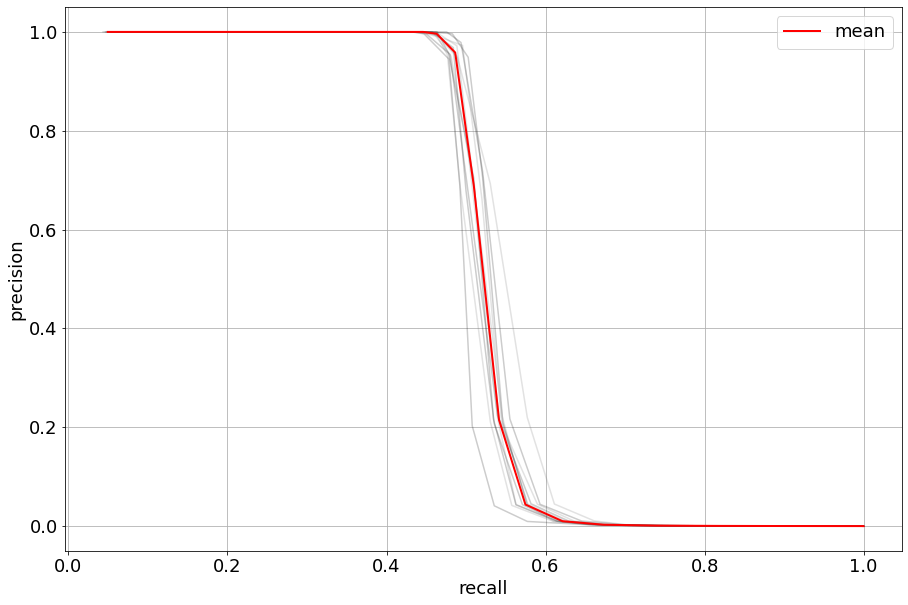

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(np.array(r).T, np.array(p).T, label='_nolegend_', alpha=0.2)
plt.plot(np.array(r).mean(axis=0), np.array(p).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
plt.grid()
plt.xlabel('recall', fontsize=18)
plt.ylabel('precision', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

In [35]:
#interp_p = np.interp(1.3, np.array(r).mean(axis=0), np.array(p).mean(axis=0))
n_sigma = 1.3
interp_p = np.interp(n_sigma, np.array(t).mean(axis=0), np.array(p).mean(axis=0))
interp_r = np.interp(interp_p, np.array(p).mean(axis=0), np.array(r).mean(axis=0))
print('Precision at sigma: {}, Recall: {}'.format(interp_p, interp_r))

Precision at sigma: 0.0021695444912215914, Recall: 0.872890425859112


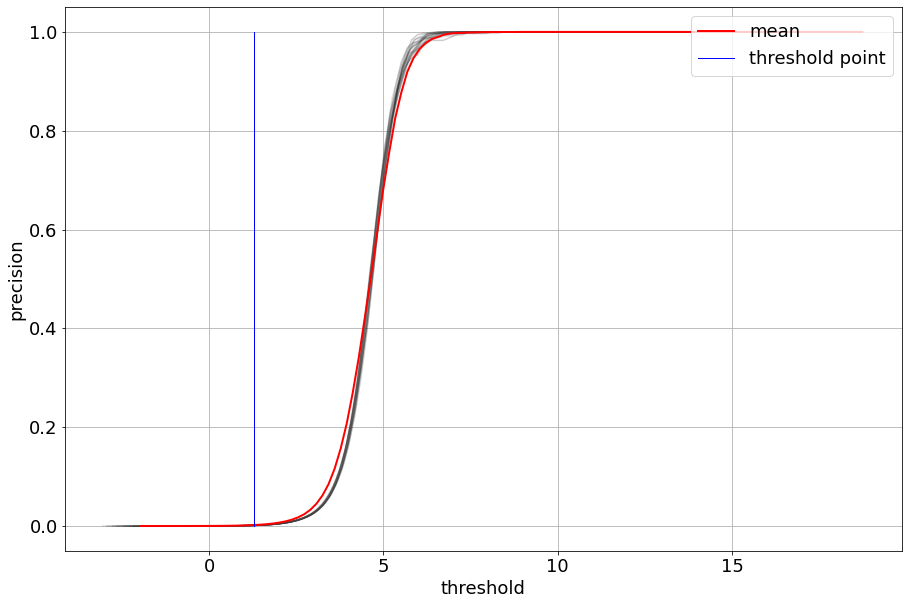

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(np.array(t).T, np.array(p).T, label='_nolegend_', alpha=0.2)
plt.plot(np.array(t).mean(axis=0), np.array(p).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
plt.plot(n_sigma*np.ones((100,)), np.linspace(0,1, 100), color = 'b', linewidth=1.0, label='threshold point')
plt.grid()
plt.xlabel('threshold', fontsize=18)
plt.ylabel('precision', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=1, fontsize=18)

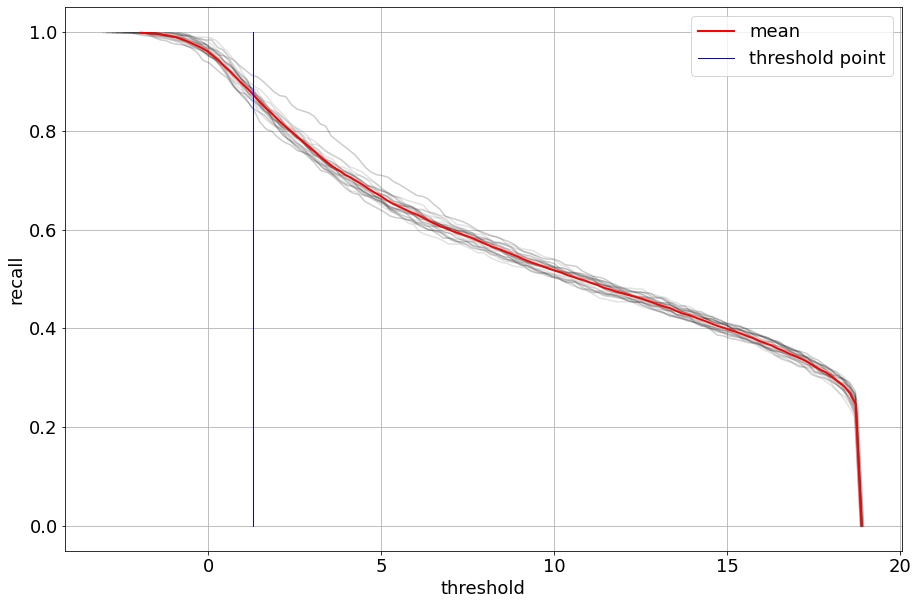

In [38]:
plt.figure(figsize=(15, 10))
plt.plot(np.array(t).T, np.array(r).T, label='_nolegend_', alpha=0.2)
plt.plot(np.array(t).mean(axis=0), np.array(r).mean(axis=0), color = 'r', linewidth=2.0, label='mean')
plt.plot(n_sigma*np.ones((100,)), np.linspace(0,1, 100), color = 'b', linewidth=1.0, label='threshold point')
plt.grid()
plt.xlabel('threshold', fontsize=18)
plt.ylabel('recall', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=1, fontsize=18)

### Get precision of other filters

In [75]:
threshold_info = {'filter':[], 'parameter': [], 'precision': [], 'recall': [], 'threshold': []}
for filter_name in np.unique(best_filters['filter']):
#filter_name = 'cygno'
    try:
        p = best_filters[best_filters['filter']==filter_name].precision.values[0]
        r = best_filters[best_filters['filter']==filter_name].recall.values[0]
        t = best_filters[best_filters['filter']==filter_name].threshold.values[0]
        
        f_rp = interpolate.interp1d(np.array(r).mean(axis=0), np.array(p).mean(axis=0))
        f_rt = interpolate.interp1d(np.array(r).mean(axis=0), np.array(t).mean(axis=0))
        
        if filter_name == 'cygno':
            interp_t_filt = n_sigma
            interp_p_filt = interp_p
        else:
            interp_t_filt = f_rt(interp_r)[()]
            interp_p_filt = f_rp(interp_r)[()]
        
        #interp_p_filt = np.interp(interp_r, np.array(r).mean(axis=0), np.array(p).mean(axis=0))
        #interp_t_filt = np.interp(interp_r, np.array(r).mean(axis=0), np.array(t).mean(axis=0))
        #interp_t = np.interp(interp_p, np.array(p).mean(axis=0), np.array(t).mean(axis=0))
        #interp_r = np.interp(interp_p, np.array(p).mean(axis=0), np.array(r).mean(axis=0))
        threshold_info['filter'].append(filter_name)
        threshold_info['parameter'].append(best_filters[best_filters['filter']==filter_name].parameter.values[0])
        threshold_info['precision'].append(interp_p_filt)
        threshold_info['recall'].append(interp_r)
        threshold_info['threshold'].append(interp_t_filt)
        print('Filter {}, threshold {}, recall {}, precision {}'.format(filter_name, interp_t_filt, interp_r, interp_p_filt))
    except:
        print('Error at {}'.format(filter_name))

Filter bm3D, threshold 2.7551553733480314, recall 0.872890425859112, precision 0.11055771680867782
Filter cygno, threshold 1.3, recall 0.872890425859112, precision 0.0021695444912215914
Filter gaussian, threshold 38.994091288129844, recall 0.872890425859112, precision 0.9414553473428433
Filter mean, threshold 11.400147296868143, recall 0.872890425859112, precision 0.937054504264916
Filter median, threshold 9.456298116148174, recall 0.872890425859112, precision 0.9145787875064251
Filter tv, threshold 12.941749954783987, recall 0.872890425859112, precision 0.8236725785418472
Filter unet, threshold 0.7432660026473762, recall 0.872890425859112, precision 0.9581500350991978
Filter wavelets, threshold -1.7557489671338384, recall 0.872890425859112, precision 0.0017840320565779453
Filter wiener, threshold 1.3, recall 0.872890425859112, precision 0.002169544491221591


In [76]:
output = pd.DataFrame(threshold_info).sort_values(by='recall', ascending=False)

In [77]:
output

,filter,parameter,precision,recall,threshold
0,bm3D,8,0.110558,0.87289,2.755155
1,cygno,0,0.002170,0.87289,1.300000
2,gaussian,21,0.941455,0.87289,38.994091
3,mean,11,0.937055,0.87289,11.400147
4,median,21,0.914579,0.87289,9.456298
5,tv,0,0.823673,0.87289,12.941750
6,unet,0,0.958150,0.87289,0.743266
7,wavelets,0,0.001784,0.87289,-1.755749
8,wiener,1,0.002170,0.87289,1.300000


In [78]:
output.reset_index().to_json('../data/clustering_params.json', orient='records')

array(1.3)

In [74]:
interp_t_filt[()]

1.3